In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt 

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/plant_village_dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE) ,
    batch_size = BATCH_SIZE
)

Found 54635 files belonging to 38 classes.


In [5]:
class_names = dataset.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [6]:
len(dataset)   # No Of Batches

1708

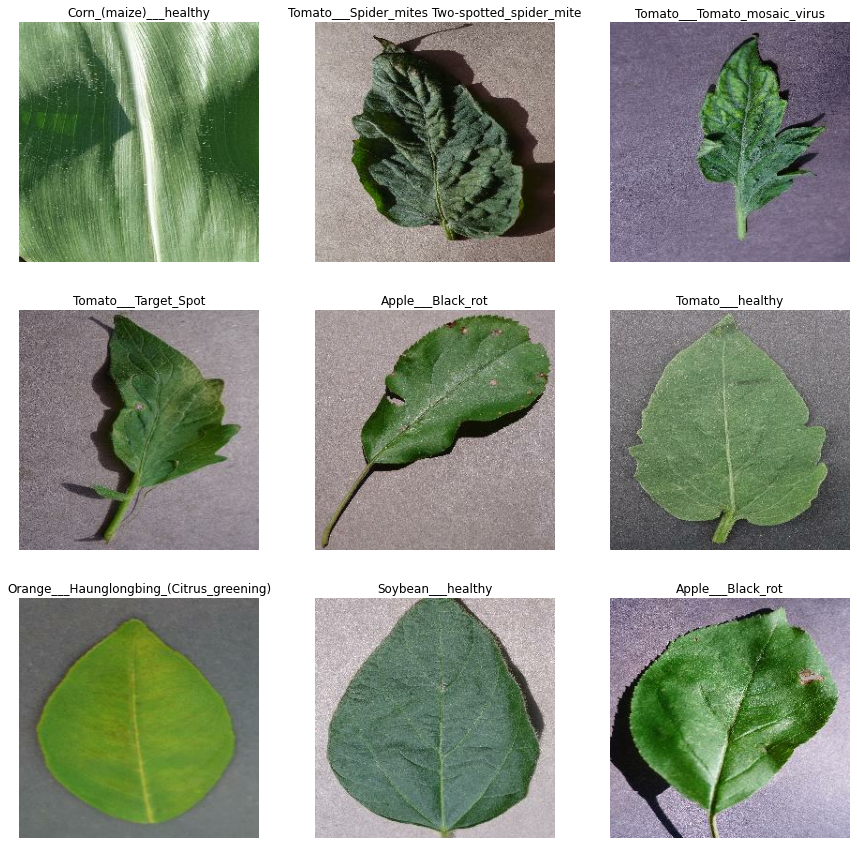

In [7]:
plt.figure(figsize=(15,15))
for image_batch , label_batch in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

80% ==> training  <br> 
20% ==> 10% Validation , 10% Test <br>
After each training iteration , we do the validation  <br>
At the end we do the testing of model

In [8]:
len(dataset) # 68 * 32 batches

1708

In [9]:
train_size = 0.8
len(dataset)*train_size

1366.4

In [10]:
train_ds = dataset.take(1366)
len(train_ds)

1366

In [11]:
test_ds = dataset.skip(1366)
len(test_ds)

342

In [12]:
val_size=0.1
len(dataset)*val_size

170.8

In [13]:
val_ds = test_ds.take(170)
len(val_ds)

170

In [14]:
test_ds=test_ds.skip(170)
len(test_ds)

172

In [6]:
def get_dataset_partitions_tf(ds,train_split=0.8 , val_split = 0.1 , test_split = 0.1 ,shuffle=True, shuffle_size=10000):
  ds_size=len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)
  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)
  train_ds = ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)

  return train_ds , val_ds , test_ds

In [7]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [8]:
print("Sizes Of :")
print("Train Set :",len(train_ds)," [20%]")
print("Validation Set :",len(val_ds)," [10%]")
print("Test Set :",len(test_ds)," [10%]")


Sizes Of :
Train Set : 1366  [20%]
Validation Set : 170  [10%]
Test Set : 172  [10%]


In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [10]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)

])

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [12]:
input_shape = (BATCH_SIZE , IMAGE_SIZE , IMAGE_SIZE , CHANNELS)
n_classes = 38

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation ='relu' , input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3) , activation = 'relu') , 
    layers.MaxPooling2D((2,2)) ,
    layers.Conv2D(64, kernel_size = (3,3) , activation = 'relu') , 
    layers.MaxPooling2D((2,2)) ,

    layers.Conv2D(64,(3,3), activation = 'relu') , 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu') , 
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu') , 
    layers.MaxPooling2D((2,2)) ,
    
    layers.Flatten() ,
    layers.Dense(64, activation = 'relu') ,
    layers.Dense(n_classes , activation = 'softmax')
])

model.build(input_shape = input_shape)

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [2]:
model.compile(optimizer= 'adam' ,
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
              metrics= ['accuracy']
)

NameError: ignored

In [1]:
model.fit(
    train_ds,
    epochs=10,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

NameError: ignored

In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
scores

In [ ]:
print(history.params)

print(history.history..keys())

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Training Accuracy')
plt.title(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title("Training & Validation_Accuracy") 

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='Training Loss')
plt.title(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training & Validation Loss")     
plt.show()    